# Neural network development for turbulence modeling in URANS simulations of non-Newtonian media slope flows

URANS mathematical model:
\begin{equation}
	\label{vof}
	\left\{
		\begin{aligned}
			&\boldsymbol{\nabla} \cdot \bar{\boldsymbol{u}} = 0,\\
			&\frac{\partial \alpha}{\partial t} + \boldsymbol{\nabla} \cdot (\bar{\boldsymbol{u}} \alpha) = 0,\\
			&\frac{\partial (\rho \bar{\boldsymbol{u}})}{\partial t} + \boldsymbol{\nabla} \cdot (\rho \bar{\boldsymbol{u}} \bar{\boldsymbol{u}}) = -\boldsymbol{\nabla} \bar{p} + \boldsymbol{\nabla} \cdot \bar{\boldsymbol{\tau}} + \rho \bar{\boldsymbol{f}}.
		\end{aligned}
	\right.
\end{equation}
Here $\bar{\boldsymbol{u}}$ is the speed of the mixture, horizontal bar means Reynolds averaging, $\alpha$ is the volume fraction of the selected phase, $\bar{\boldsymbol{\tau}} = \bar{\boldsymbol{\tau}}_{Re} + \bar{\boldsymbol{\tau}}_m$ is the stress tensor calculated as sum of Reynolds stress tensor and viscous stress tensor, $\bar{\boldsymbol{\tau}}_m = 2 \mu \bar{\boldsymbol{s}}$ is the viscous stress tensor, which is a function of the strain rate tensor $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$, $\mu = \nu \rho$ is dynamic viscosityof a mixture which is calculated as a product of density and kinematic viscosity of mixture, $\nu = \nu_1 \alpha + \nu_0 (1 -\alpha)$ is the kinemsatic viscosity of mixture calculated according to the principle of the weighted average, $\nu_0$ is a constant, $\nu_1 = min (\nu_*, (\tau_* + K \dot{\gamma}^n) / \dot{\gamma})$ is Herschel-Bulkley reology ratio, $\rho = \rho_1 \alpha + \rho_0 (1 - \alpha)$ is the mixture density, $\rho_0$ and $\rho_1$ are constants, $\bar{p}$ is the pressure, $\bar{\boldsymbol{f}}$ is the density of the body forces.

The $\bar{\boldsymbol{\tau}}_{Re}$ Reynolds stress tensor is calculetaed using Tensor Basis Neural Network (TBNN) according to the principle presented in the work of Pope [1]. It is presented as function of strain rate $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ and rotation rate $\bar{\boldsymbol{r}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} - (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ tensors, and 10 their isotropic combinations $T^i$ and 5 invariants $\lambda_i$. Calculations performed for normalized tensors $\bar{\tau}_{Re}'$, $\bar{\boldsymbol{s}}'$, $\bar{\boldsymbol{r}}'$. The scaling parameters $U_0$, $h_0$, $\rho$ used for normalization:

\begin{equation}
	\label{norm}
	\left\{
		\begin{aligned}
			&\bar{\boldsymbol{\tau}}_{Re} = \bar{\boldsymbol{\tau}}_{Re}' \rho U_0 h_0,\\
			&\bar{\boldsymbol{s}} = \bar{\boldsymbol{s}}' U_0^2 / h_0,\\
			&\bar{\boldsymbol{r}} = \bar{\boldsymbol{r}}' U_0^2 / h_0.
		\end{aligned}
	\right.
\end{equation}

In what follows, we omit the apostrophe symbol and keep in mind that we are considering normalized tensors.

Normalized Reynolds stress tensor is

\begin{equation}
	\label{MLReynolds}
	\bar{\boldsymbol{\tau}}_{Re} = \sum\limits_{n=1}^{10} g^{(n)} (\lambda_1, ... , \lambda_5) \boldsymbol{T}^{(n)}.
\end{equation}

\begin{equation}
	\begin{aligned}
		&\boldsymbol{T}^{(1)} = \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(6)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} + \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \frac{2}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(2)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} - \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(7)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} \bar{\boldsymbol{r}},\\
		&\boldsymbol{T}^{(3)} = \bar{\boldsymbol{s}}^2 - \frac{1}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2),
		&&\boldsymbol{T}^{(8)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},\\
		&\boldsymbol{T}^{(4)} = \bar{\boldsymbol{r}}^2 - \frac{1}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{r}}^2),
		&&\boldsymbol{T}^{(9)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 + \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \frac{2}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(5)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
		&&\boldsymbol{T}^{(10)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
	\end{aligned}
\end{equation}
\begin{equation}
	\lambda_1 = Tr(\bar{\boldsymbol{s}}^2),\ \ \ \ \lambda_2 = Tr(\bar{\boldsymbol{r}}^2),\ \ \ \ \lambda_3 = Tr(\bar{\boldsymbol{s}}^3),\ \ \ \ \lambda_4 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}),\ \ \ \ \lambda_5 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2).
\end{equation}

Calculations performed for turbulent flow in inclined chute with the rectangular cross-section. Scheme of flow is shown in figure below.

<div>
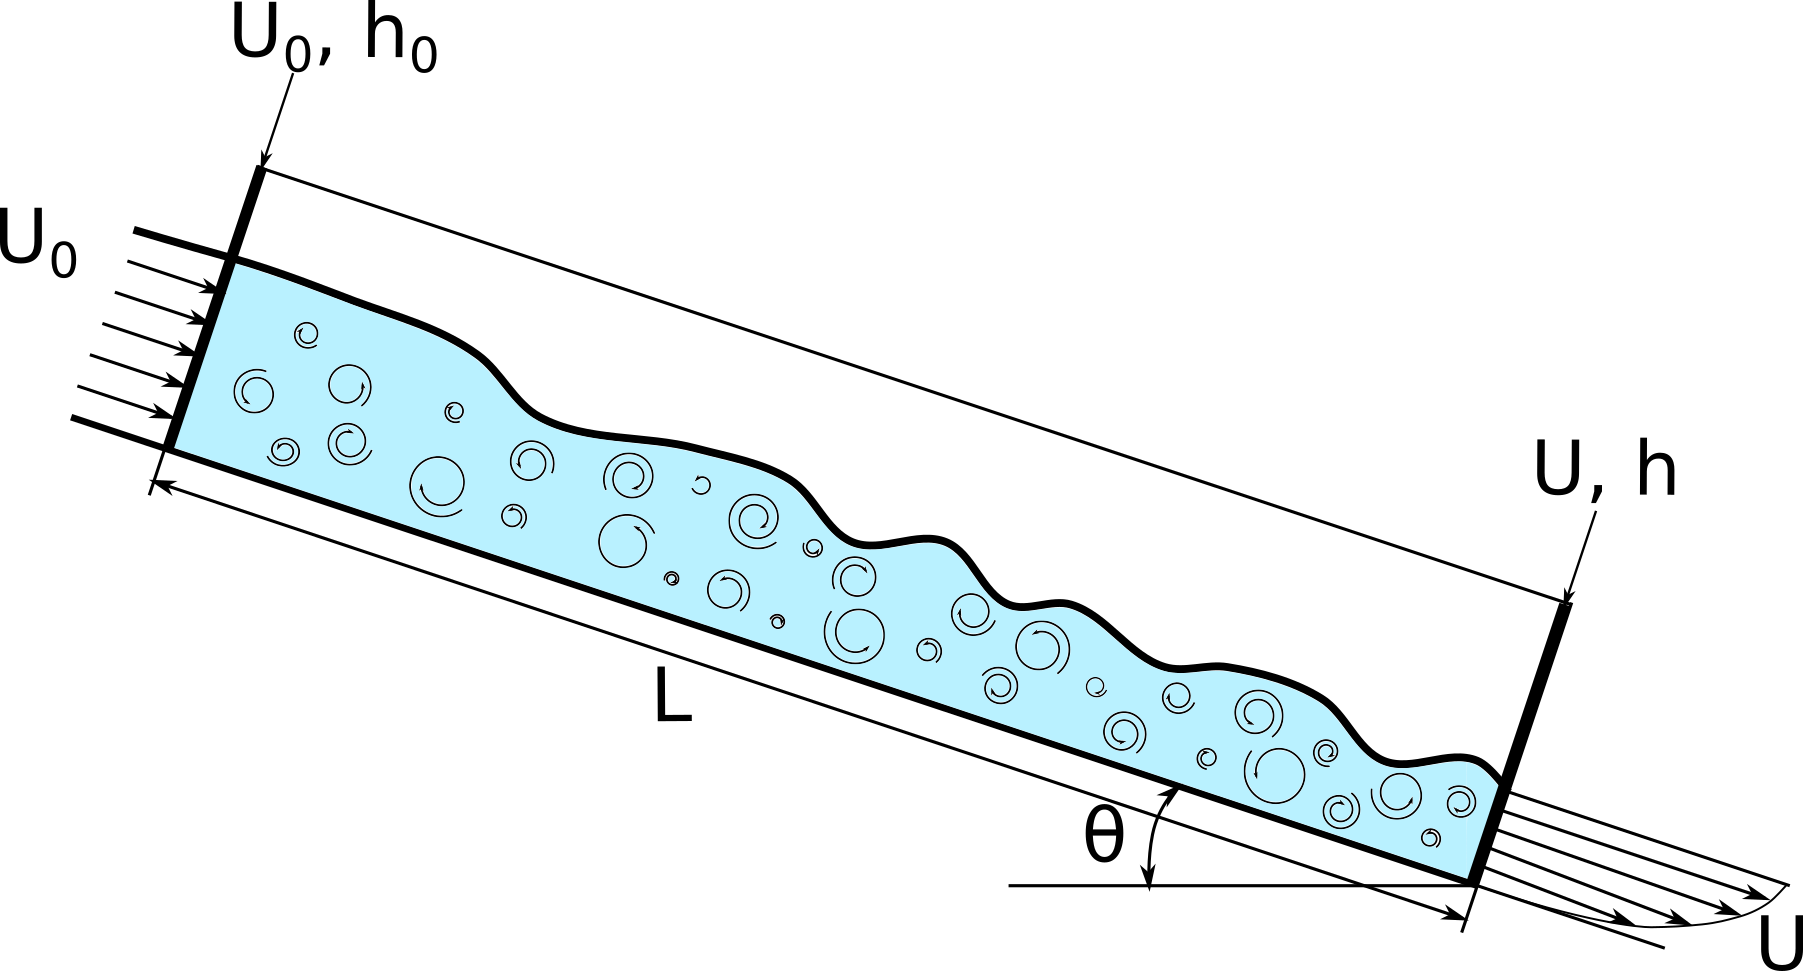
</div>

In the considered flow
\begin{equation}
    U_0 = 0.4 \text{m}/\text{s},\ \ \ h_0 = 0.01 \text{m}.
\end{equation}

Reynolds number of flow is 
\begin{equation}
    \text{Re} = U_0 h_0 / \nu_{eff},
\end{equation}

\begin{equation}
    \nu_{eff} = \frac{\tau_* + K (U_0/h_0)^n}{\rho (U_0 / h_0)}.
\end{equation}

Constants in calculation are set as follows:

\begin{equation}
    \nu_* = 10^7\ \text{m}^2/\text{s},\ \ \ \tau_* = 0.02\ \text{m}^2/\text{s}^2,\ \ \ K = 0.001\ \text{m}^2/\text{s},\ \ \ n = 0.8,\ \ \ \rho = 100\ \text{kg}/\text{m}^3.
\end{equation}

So effective viscosity and Reynolds number are:

\begin{equation}
    \nu_{eff} = 9.782 \cdot 10^{-6}\ \text{m}^2/\text{s},\ \ \ \text{Re} = 409.
\end{equation}

[1] S. B. Pope. A more general effective-viscosity hypothesis.Journal of Fluid Mechanics,72(2):331–340, 1975.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
def timeStepsList():
	timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
	index = np.argsort(timeStepsList.astype(np.float))
	timeStepsList = timeStepsList[index]
	return timeStepsList[1:-2]

In [27]:
def readTensor(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'3', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr[[fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'8']]

In [17]:
def readVector(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
	arr = arr.iloc[:,0].str.split(expand=True)
	arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
	arr.loc[:,:] = arr.loc[:,:].astype(float)
	return arr

In [18]:
def readScalar(fileName, folder, time, sz):
	arr = pd.read_csv(folder+time+'/'+time+'/'+fileName[0], header=None, skiprows=23, nrows=sz, dtype=str)
	arr.columns = [fileName[0]]
	arr.loc[:] = arr.loc[:].astype(float)
	return arr

In [19]:
def formDataset(TSL, folder, FsScalars, FsVectors, FsTensors, size):
	data = pd.DataFrame()
	for time in TSL:
		kwargs = {'folder':folder, 'time':time, 'sz':size}
		scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
		vectors = FsVectors.apply(readVector, axis=1, **kwargs)
		tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
		tmp = pd.concat(list(scalars[:])+list(vectors[:])+list(tensors[:]), axis=1)
		data = data.append(tmp, ignore_index=True)
	return data

In [30]:
TSL = timeStepsList()
lenTSL = len(TSL)
folder = 'TIF'
deltaT = 1e-06
size = 27500
FsScalars = pd.DataFrame([['alpha.water'], ['res/alpha.water'], ['res/p'], ['res/I0'], ['res/I1'],\
                          ['res/I2'], ['res/I3'], ['res/I4']])
FsVectors = pd.DataFrame([['U'], ['res/U'], ['res/Uref']])
FsTensors = pd.DataFrame([['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], \
                          ['res/T6'], ['res/T7'], ['res/T8'], ['res/T9']])

In [31]:
trainTSL = TSL[:int(lenTSL/3)]
testTSL = TSL[int(lenTSL/3):]
trainData = formDataset(trainTSL, folder, FsScalars, FsVectors, FsTensors, size)
trainData['dU0'] = trainData['res/U0'] - trainData['U0']
trainData['dU1'] = trainData['res/U1'] - trainData['U1']
trainData['dU2'] = trainData['res/U2'] - trainData['U2']
trainData['dAW'] = trainData['res/alpha.water'] - trainData['alpha.water']
print(trainData.columns)

Index(['alpha.water', 'res/alpha.water', 'res/p', 'res/I0', 'res/I1', 'res/I2',
       'res/I3', 'res/I4', 'U0', 'U1', 'U2', 'res/U0', 'res/U1', 'res/U2',
       'res/Uref0', 'res/Uref1', 'res/Uref2', 'res/T00', 'res/T01', 'res/T02',
       'res/T04', 'res/T05', 'res/T08', 'res/T10', 'res/T11', 'res/T12',
       'res/T14', 'res/T15', 'res/T18', 'res/T20', 'res/T21', 'res/T22',
       'res/T24', 'res/T25', 'res/T28', 'res/T30', 'res/T31', 'res/T32',
       'res/T34', 'res/T35', 'res/T38', 'res/T40', 'res/T41', 'res/T42',
       'res/T44', 'res/T45', 'res/T48', 'res/T50', 'res/T51', 'res/T52',
       'res/T54', 'res/T55', 'res/T58', 'res/T60', 'res/T61', 'res/T62',
       'res/T64', 'res/T65', 'res/T68', 'res/T70', 'res/T71', 'res/T72',
       'res/T74', 'res/T75', 'res/T78', 'res/T80', 'res/T81', 'res/T82',
       'res/T84', 'res/T85', 'res/T88', 'res/T90', 'res/T91', 'res/T92',
       'res/T94', 'res/T95', 'res/T98', 'dU0', 'dU1', 'dU2', 'dAW'],
      dtype='object')


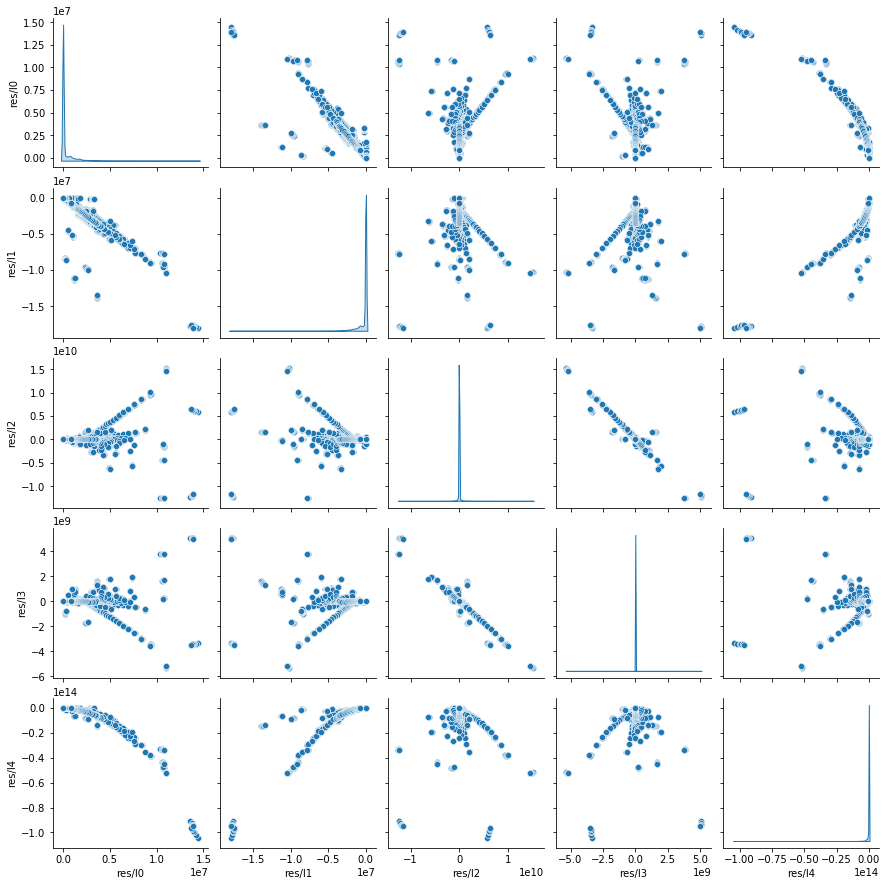

In [22]:
sns.pairplot(trainData[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']], diag_kind='kde')

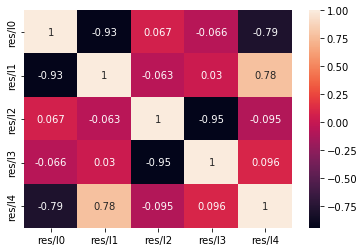

In [33]:
sns.heatmap(trainData[['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4']].corr(), annot = True)

In [36]:
def log10pm(x):
    if x>0:
        return np.log10(x)
    elif x<0:
        return -np.log10(-x)
    else:
        return 0
nplog10pm = np.vectorize(log10pm)

In [43]:
trainData['log_res/I0'] = nplog10pm(trainData['res/I0'])
trainData['log_res/I1'] = nplog10pm(trainData['res/I1'])
trainData['log_res/I2'] = nplog10pm(trainData['res/I2'])
trainData['log_res/I3'] = nplog10pm(trainData['res/I3'])
trainData['log_res/I4'] = nplog10pm(trainData['res/I4'])

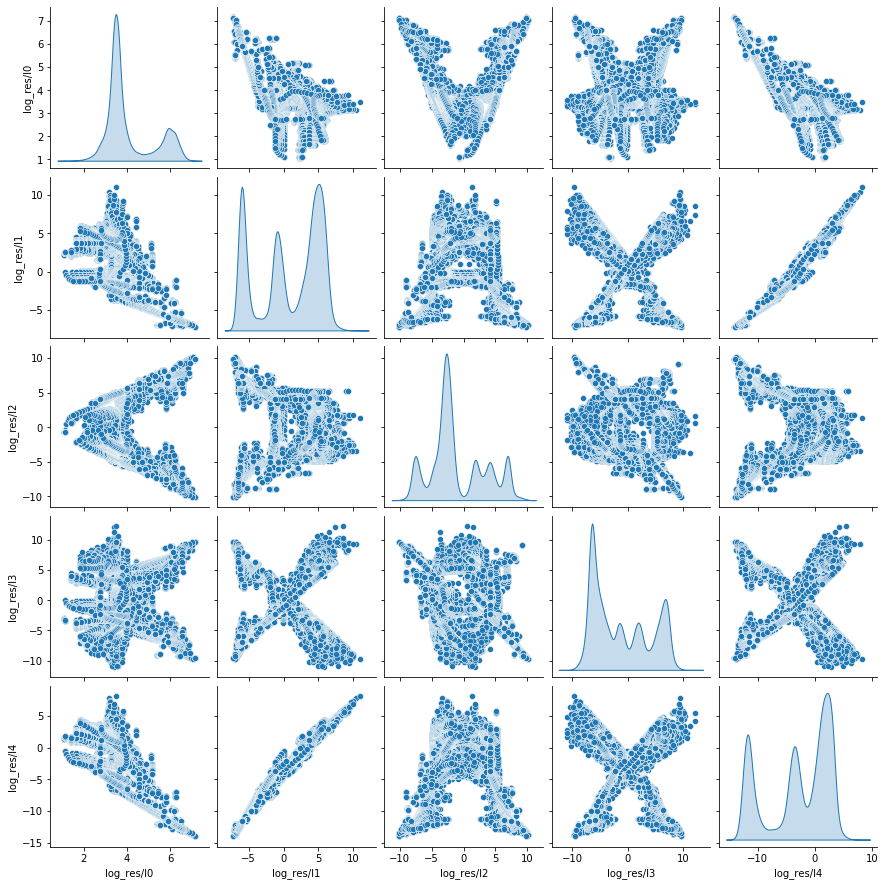

In [44]:
sns.pairplot(trainData[['log_res/I0', 'log_res/I1', 'log_res/I2', 'log_res/I3', 'log_res/I4']], diag_kind='kde')

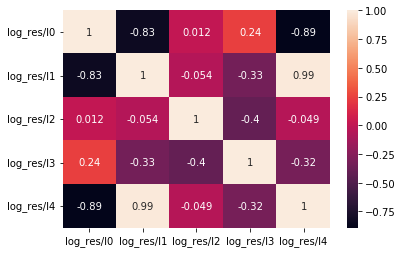

In [45]:
sns.heatmap(trainData[['log_res/I0', 'log_res/I1', 'log_res/I2', 'log_res/I3', 'log_res/I4']].corr(), annot = True)

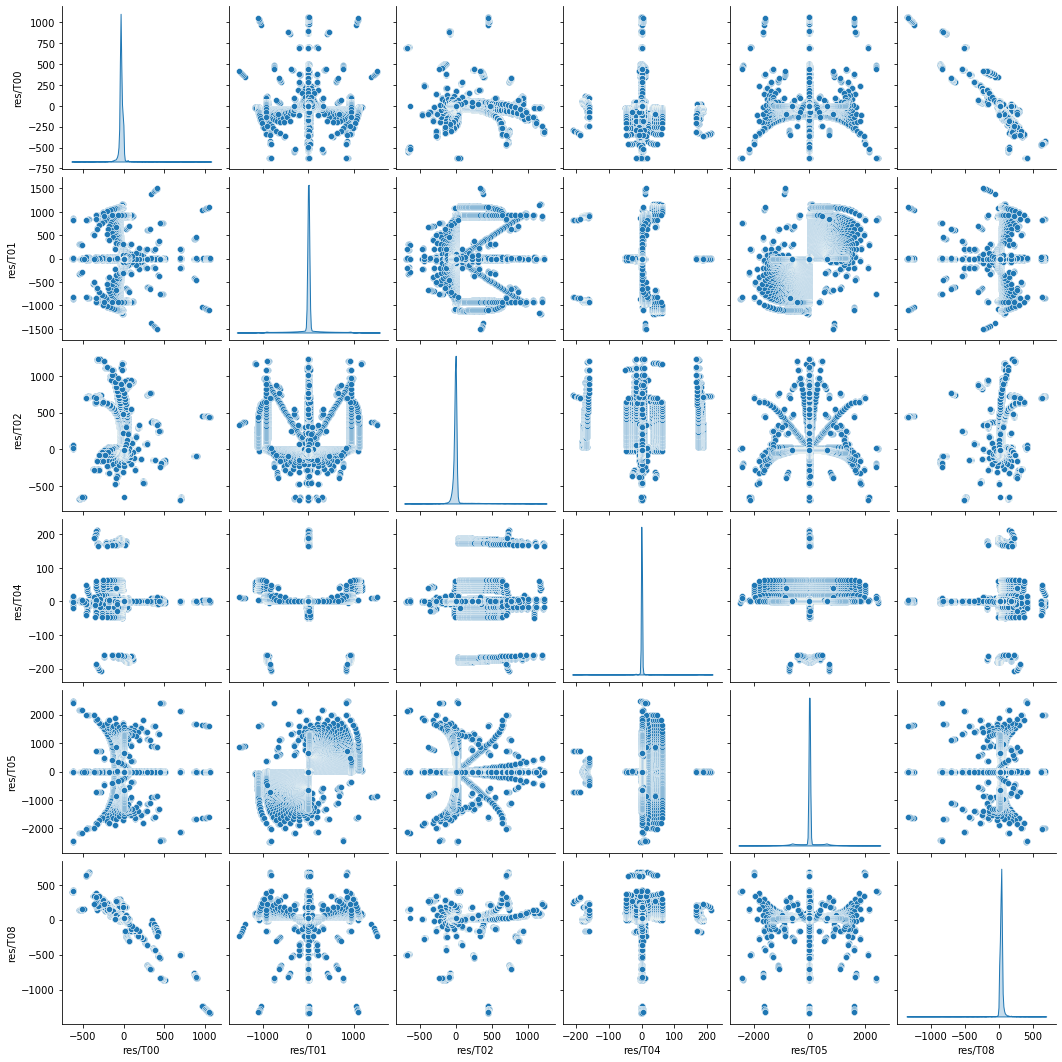

In [26]:
sns.pairplot(trainData[['res/T00', 'res/T01', 'res/T02', 'res/T04', 'res/T05', 'res/T08']], diag_kind='kde')

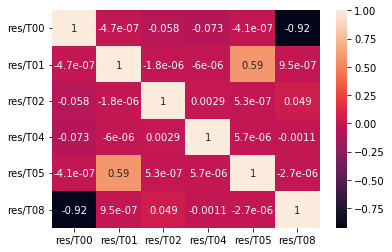

In [48]:
sns.heatmap(trainData[['res/T00', 'res/T01', 'res/T02', 'res/T04', 'res/T05', 'res/T08']].corr(), annot = True)

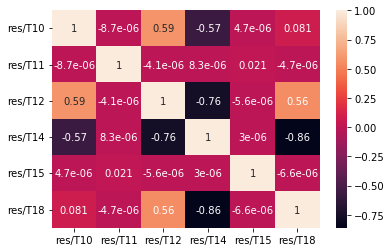

In [50]:
sns.heatmap(trainData[['res/T10', 'res/T11', 'res/T12', 'res/T14', 'res/T15', 'res/T18']].corr(), annot = True)

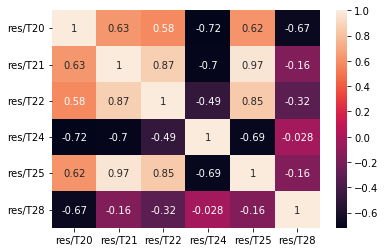

In [52]:
sns.heatmap(trainData[['res/T20', 'res/T21', 'res/T22', 'res/T24', 'res/T25', 'res/T28']].corr(), annot = True)

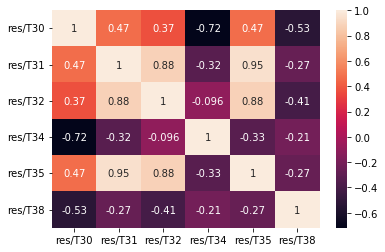

In [54]:
sns.heatmap(trainData[['res/T30', 'res/T31', 'res/T32', 'res/T34', 'res/T35', 'res/T38']].corr(), annot = True)

In [46]:
trainData['log_res/T00'] = nplog10pm(trainData['res/T00'])
trainData['log_res/T01'] = nplog10pm(trainData['res/T01'])
trainData['log_res/T02'] = nplog10pm(trainData['res/T02'])
trainData['log_res/T04'] = nplog10pm(trainData['res/T04'])
trainData['log_res/T05'] = nplog10pm(trainData['res/T05'])
trainData['log_res/T08'] = nplog10pm(trainData['res/T08'])

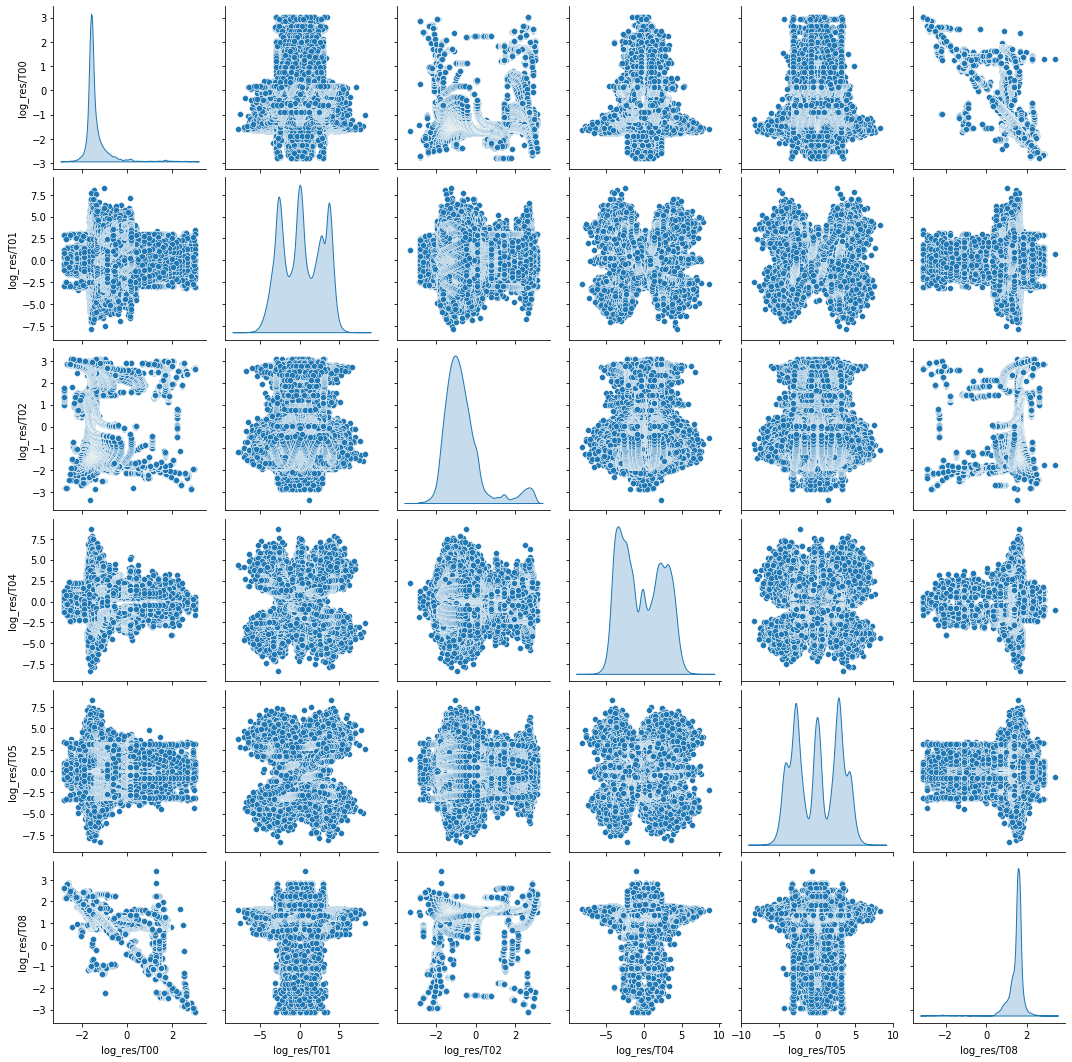

In [47]:
sns.pairplot(trainData[['log_res/T00', 'log_res/T01', 'log_res/T02', 'log_res/T04',\
                        'log_res/T05', 'log_res/T08']], diag_kind='kde')

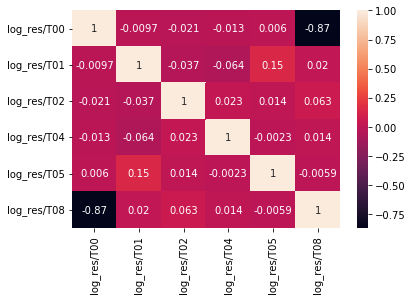

In [49]:
sns.heatmap(trainData[['log_res/T00', 'log_res/T01', 'log_res/T02', 'log_res/T04',\
                        'log_res/T05', 'log_res/T08']].corr(), annot = True)

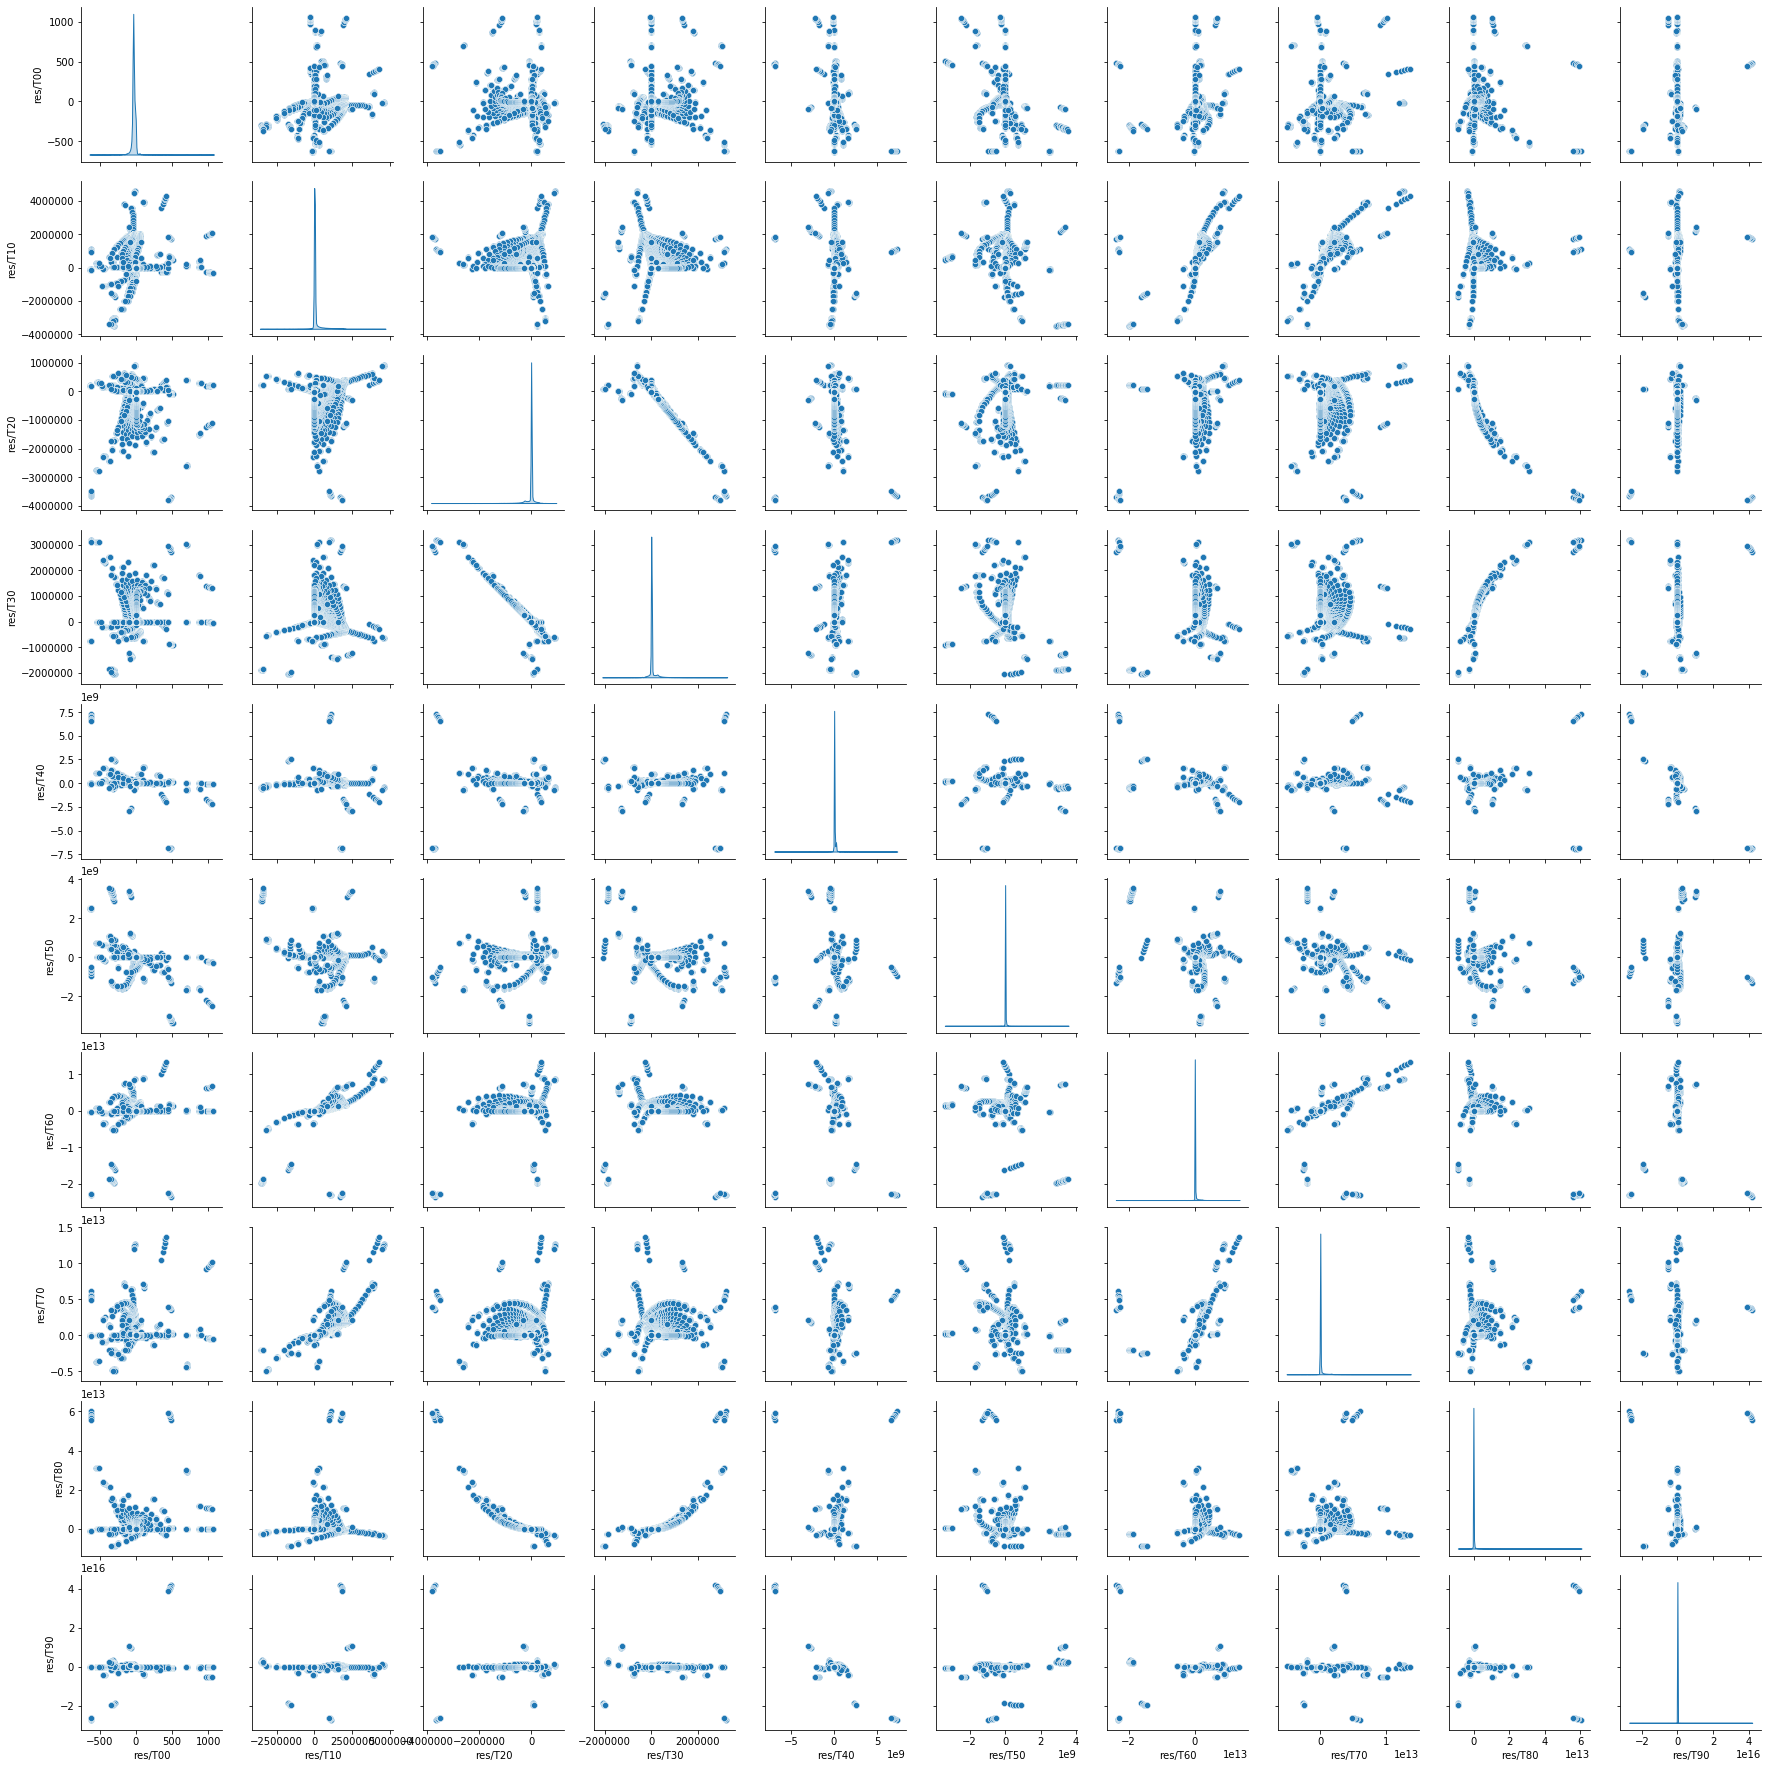

In [32]:
sns.pairplot(trainData[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                        'res/T60', 'res/T70', 'res/T80', 'res/T90']], diag_kind='kde')

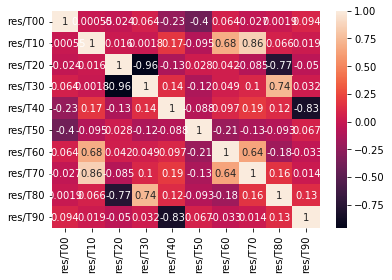

In [34]:
sns.heatmap(trainData[['res/T00', 'res/T10', 'res/T20', 'res/T30', 'res/T40', 'res/T50',\
                        'res/T60', 'res/T70', 'res/T80', 'res/T90']].corr(), annot = True)

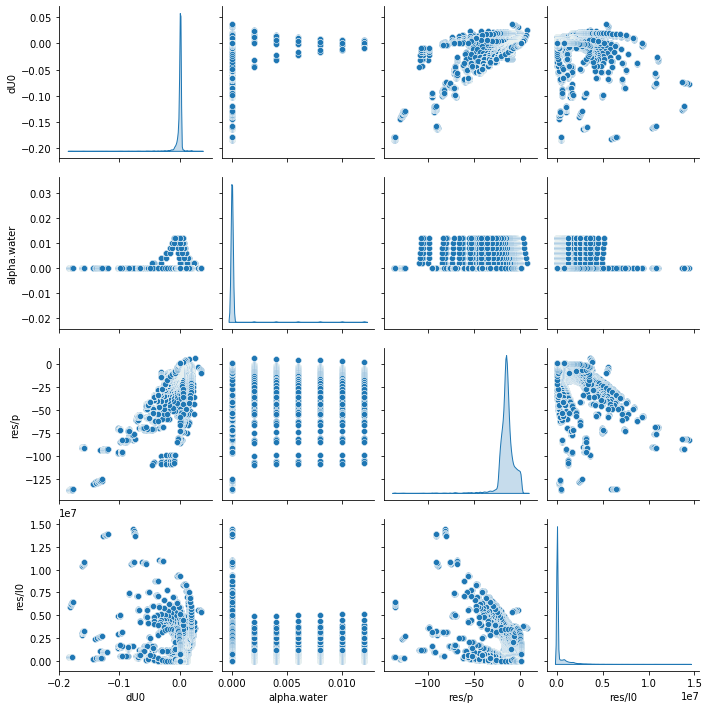

In [9]:
sns.pairplot(trainData[['dU0', 'alpha.water', 'res/p', 'res/I0']], diag_kind='kde')

In [ ]:
#testData = formDataset(testTSL, folder, FsScalars, FsVectors, FsTensors, size)

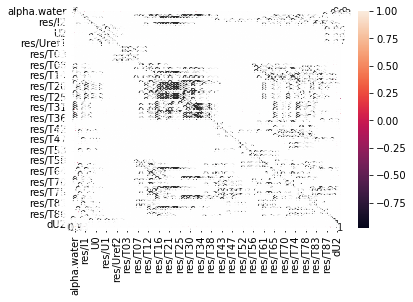

In [9]:
sns.heatmap(trainData.corr(), annot = True)